<a href="https://colab.research.google.com/github/lakhanrajpatlolla/aiml-learning/blob/master/U4W22_75_Spam_Detection_Using_BERT_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to:

* understand  BERT (Bidirectional Encoder Representations from Transformers)  Algorithm implementation
* understand how to preprocess text into an appropriate format


In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="850" height="480" controls>
  <source src="https://cdn.exec.talentsprint.com/non-processed/SPAM_Detection.mp4" type="video/mp4">
</video>
""")

### Dataset Description

The spam and ham dataset have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham or spam.



In [1]:
!pip -q install -U "tensorflow-text==2.15.*"
!pip -q install -U "tf-models-official==2.15.*"

In [ ]:
!pip uninstall numpy pandas -y
!pip install numpy==1.26.4 pandas==2.2.2
import os
os.kill(os.getpid(), 9)  # Forces a full restart of the runtime

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, but you have tf-keras 2.15.1 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.6 which is incompatible.
tensorflow-deci

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2418775" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959000490" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import re
ipython = get_ipython()

notebook= "U4W22_75_Spam_Detection_Using_BERT_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/spam_data.csv")
    ipython.magic("sx pip install tensorflow_text")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### **Import the Libraries**

In [4]:
import numpy as np
import pandas as pd
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Activation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report

**Load the Data**

In [5]:
data = pd.read_csv('/content/spam_data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Pre-Processing

In [6]:
# Check count of the unique rows in the DataFrame
data['Category'].value_counts()

,count
Category,
ham,4825
spam,747


As the data is imbalanced and there are more good emails(ham) than spam emails. This may lead to OVERFITTING as a model may learn all the features of the ham emails over spam emails. So, downsample the data before preparing the model.

**Downsampling Data**

Downsampling is a technique where the majority class is downsampled to match the minority class. So, perform downsampling by just picking any random 747 samples from the ham class.

In [7]:
# Collect spam and ham datasets

df_spam = data[data['Category']=='spam']
df_ham = data[data['Category']=='ham']

print("Ham Dataset Shape:", df_ham.shape)
print("Spam Dataset Shape:", df_spam.shape)

Ham Dataset Shape: (4825, 2)
Spam Dataset Shape: (747, 2)


In [8]:
# Downsample ham dataset by taking only random 747 example
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [9]:
# Concatinate both datasets and verify the unique rows count of the class labels
df_balanced = pd.concat([df_spam , df_ham_downsampled])
df_balanced['Category'].value_counts()

,count
Category,
spam,747
ham,747


**LabelEncoder**

LabelEncoder converts the categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1, where n is the number of distinct labels

In [10]:
# Convert the labels into a numeric form using LabelEncoder
label_encoder = preprocessing.LabelEncoder()
df_balanced['Category'] = label_encoder.fit_transform(df_balanced['Category'])
df_balanced['Category'].unique()

array([1, 0])

In [11]:
# Split the data in a strafied fashion to preserve the same proportions of samples in each class
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(df_balanced['Message'], df_balanced['Category'], stratify = df_balanced['Category'])
print("Train split by classes\n",y_train.value_counts(),"\n\n", "Test split by classes\n",y_test.value_counts())

Train split by classes
 Category
0    560
1    560
Name: count, dtype: int64 

 Test split by classes
 Category
0    187
1    187
Name: count, dtype: int64


### BERT (Bidirectional Encoder Representations from Transformers)

BERT provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture.

It was originally published by
Jacob Devlin, Ming-Wei Chang, Kenton Lee, Kristina Toutanova: "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding", 2018.

**Prepare the Model**

1.   Download the bert model and fine-tune the model using Keras Functional API.

     * TensorFlow Hub model uses the implementation of BERT from the TensorFlow Models repository on GitHub at **tensorflow/models/official/nlp/bert**.
     * It has hidden layers of L = 12(i.e., Transformer blocks), a hidden size of H = 768, and attention heads of A = 12.

2.   text_input: As the model data shape can be anything, so given shape parameters as shape() and data type as tf. string

3.   Preprocess the Text inputs and transform to numeric token ids before being input to BERT.

4.  Pass through the Bert model and it returns pooled output.
    * pooled_output represents each input sequence as a whole. The shape is [batch_size, Hidden size].

5.   Dropout: Set dropout rate 0.1, which means 10% of neurons will randomly shut off and pass embedding dictionary pooled_output as an input to this layer.


In [12]:
# Downloading preprocessing files and model from the TF models repository. This will take more time for dowloading the files
preprocessing_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [13]:
def build_classifier_model():
  text_input = keras.layers.Input(shape=(), dtype=tf.string, name='text')
  # Preprocess the text inputs
  encoder_inputs = preprocessing_layer(text_input)
  # Pass through the bert model
  outputs = bert_encoder(encoder_inputs)
  # Model returns embedding of the entire dataset
  net = outputs['pooled_output']
  # Pass the entire training data embeddings to the dropout layer.
  net = keras.layers.Dropout(0.1)(net)
  # Dense Layer
  net = keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  results = keras.Model(text_input, net)
  return results


In [14]:
model = build_classifier_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [15]:
# Compiling the model
metrics = tf.keras.metrics.BinaryAccuracy()
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = metrics)

### Train and Evaluate the model


In [16]:
# This will take more time for execution.
history = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
35/35 [==============================] - 323s 9s/step - loss: 0.6095 - binary_accuracy: 0.6884
Epoch 2/5
35/35 [==============================] - 300s 9s/step - loss: 0.4898 - binary_accuracy: 0.8348
Epoch 3/5
35/35 [==============================] - 304s 9s/step - loss: 0.4186 - binary_accuracy: 0.8786
Epoch 4/5
35/35 [==============================] - 300s 9s/step - loss: 0.3769 - binary_accuracy: 0.8777
Epoch 5/5
35/35 [==============================] - 297s 8s/step - loss: 0.3448 - binary_accuracy: 0.8893


In [18]:
# Evaluate the performance with the test data
model.evaluate(X_test,y_test)

12/12 [==============================] - 105s 9s/step - loss: 0.3345 - binary_accuracy: 0.8770


[0.3344897925853729, 0.8770053386688232]

### Plotting Confusion Matrix and Classification Reports

In [23]:
# Get the predictions and flatten them
y_pred = model.predict(X_test)
y_pred = y_pred.flatten() # require to be in one-dimensional array
y_pred = y_pred > 0.5 # to get the probability

12/12 [==============================] - 107s 9s/step


Text(50.722222222222214, 0.5, 'Actual')

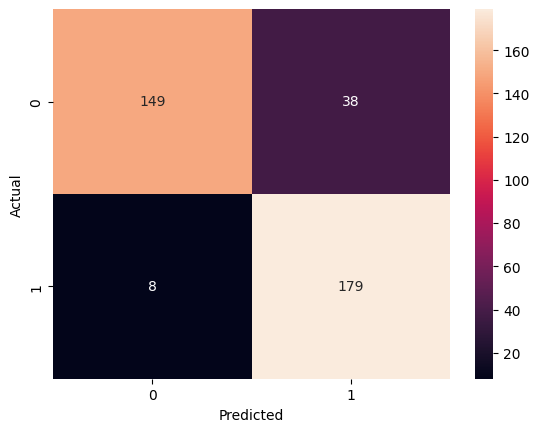

In [24]:
# Creating Confusion Matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:
# Classification Report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       187
           1       0.82      0.96      0.89       187

    accuracy                           0.88       374
   macro avg       0.89      0.88      0.88       374
weighted avg       0.89      0.88      0.88       374



### Model Prediction on set of samples

1. Create a list that contains a collection of few spam and ham emails
2. Predict the sentence category using our model and store the result in variable ‘test_result‘.
3. Create a lambda function for filtering values greater than ‘as spam’ else, not ‘spam’ using NumPy.


In [26]:
predict_text = [
                # Spam
                'We’d all like to get a $10,000 deposit on our bank accounts out of the blue, but winning a prize—especially if you’ve never entered a contest',
                'Netflix is sending you a refund of $12.99. Please reply with your bank account and routing number to verify and get your refund',
                'Your account is temporarily frozen. Please log in to to secure your account ',
                # Ham
                'The article was published on 18th August itself',
                'Although we are unable to give you an exact time-frame at the moment, I would request you to stay tuned for any updates.',
                'The image you sent is a UI bug, I can check that your article is marked as regular and is not in the monetization program.'
]

In [27]:
test_results = model.predict(predict_text)
output = np.where(test_results > 0.5,'spam', 'ham')
output

1/1 [==============================] - 2s 2s/step


array([['spam'],
       ['spam'],
       ['spam'],
       ['ham'],
       ['spam'],
       ['spam']], dtype='<U4')

### Please answer the questions below to complete the experiment:




In [17]:
#@title State True or False: BERT provides a bidirectional context and the model uses previous and the next sentence to arrive at the context during a training phase. { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "TRUE" #@param ["","TRUE", "FALSE"]

In [19]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [20]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Good" #@param {type:"string"}


In [21]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [22]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [28]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [30]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2536
Date of submission:  19 Apr 2025
Time of submission:  15:08:54
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
